<h2>FIN5615 Project #6
    <p class="text-primary">S&P 100 Return Analytics</p>
</h2>

<div class = "panel panel-success">
    <div class = "panel-heading"> 
    <span style="color:black"><b>Project Introduction</b>
    </div>
    <div class = "panel-body"> 
    In this project we will examine the historical return performance of the 100 component stocks that make up the S&P 100 index. We will also explore their correlations and identify pairs of stocks that are most highly correlated and relatively uncorrelated.
    </div>
</div>

<div class = "panel panel-success">
    <div class = "panel-heading"> 
    <span style="color:black"><b>Data</b>
    </div>
    <div class = "panel-body"> 
    The data for this project includes the historical daily prices, from the stock's inception to June 30th 2020, for each of the 100 component stocks in the S&P 100 index. In the folder "SP100", you will find one CSV file for each of the component stocks.
    <br><br>For this project, we will be focusing only on the historical closing prices listed under column "Adj Close" (adjusted for stock splits). The ticker symbols and company names of each of the stocks are included in a separate file "_SP100.csv", which you can also find the folder "SP100".
    <br><br>Download and place the entire "SP100" folder in the "Data" folder of your working directory. Remember to read in the datasets starting with the relative file path: <code>'../../Data/SP100'</code>.
    </div>
</div>

<div class = "panel panel-info">
    <div class = "panel-heading"> 
    <span style="color:black"><b>Instructions</b>
    </div>
    <div class = "panel-body"> 
    Please code you solutions directly in this Notebook under each task in the cells provided below. Include all code used to produce your results, and support your answers with textual explanations if neccessary. You may feel free to add additional Code and/or Markdown cells as needed. Code must be written using <b>Python 3</b>.
    <br><br>Please order the cells in your Notebook in the order in which they are intended to run! It is expected that your Notebook is able to run in sequence from start to finish without any errors (before submitting check by: <code>Kernel > Restart & Run All</code>).
    <br><br>Once ready, please submit your assignment as an <b>.ipynb file</b> (<code>File > Download as > Notebook</code>). You must name your files in the following format: <b><code>FIN5615_Assignmnet_1_Richard_Lee_tuc12345.ipynb</code></b>.
    </div>
</div>

---
<div class = "alert alert-block alert-warning">
    <b>Note</b>: Add any additional libraries that you plan on using to the import statements in the code block below.
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 1</b>
    </div>
    <div class = "panel-body"> 
    Read in each of the CSV files for the S&P 100 stocks in a dictionary for us to easily reference and manipulate the data.
    <br>
    <ul>
        <li>Start by reading in the companies and their stock ticker symbols into a dataframe called <code>sp100</code>, with the "Ticker" column as the index.</li>
        <li>Next, create a dictionary called <code>stock_frames</code>. This will serve as a container to store all the historical price data for the component stocks.</li>
        <li>Read in the historical price data for all stocks in <code>sp100</code> as dataframes and store them in <code>stock_frames</code> with the stock's ticker as the key. </li>
        <li>For this project, we will only need the columns "Date" and "Adj Close" so limit to just these two columns when reading in the CSV file, with the "Date" column as the dataframe's index. </li>
    </ul>
    <p style="text-align:right;">[10pts]</p>
    </div>
</div>

<div class = "alert alert-block alert-info">
    <b>Hint</b>: When reading in the CSV files, you may want to use a loop to iterate the index of *sp100* that was created earlier.
</div>

In [2]:
sp100 = pd.read_csv(f'../Data Science in Finance/Data/SP100/_SP100.csv', usecols = ['Ticker'], squeeze = True).tolist()

In [3]:
Sp100 = pd.read_csv(f'../Data Science in Finance/Data/SP100/_SP100.csv', index_col = 'Ticker')
Sp100


,Company
Ticker,
AAPL,Apple Inc.
ABBV,AbbVie Inc.
ABT,Abbott Laboratories
ACN,Accenture
ADBE,Adobe Inc.
...,...
VZ,Verizon Communications
WBA,Walgreens Boots Alliance
WFC,Wells Fargo


In [4]:
sp100

['AAPL',
 'ABBV',
 'ABT',
 'ACN',
 'ADBE',
 'AIG',
 'ALL',
 'AMGN',
 'AMT',
 'AMZN',
 'AXP',
 'BA',
 'BAC',
 'BIIB',
 'BK',
 'BKNG',
 'BLK',
 'BMY',
 'BRK.B',
 'C',
 'CAT',
 'CHTR',
 'CL',
 'CMCSA',
 'COF',
 'COP',
 'COST',
 'CRM',
 'CSCO',
 'CVS',
 'CVX',
 'DD',
 'DHR',
 'DIS',
 'DUK',
 'EMR',
 'EXC',
 'F',
 'FB',
 'FDX',
 'GD',
 'GE',
 'GILD',
 'GM',
 'GOOG',
 'GS',
 'HD',
 'HON',
 'IBM',
 'INTC',
 'JNJ',
 'JPM',
 'KHC',
 'KMI',
 'KO',
 'LLY',
 'LMT',
 'LOW',
 'MA',
 'MCD',
 'MDLZ',
 'MDT',
 'MET',
 'MMM',
 'MO',
 'MRK',
 'MS',
 'MSFT',
 'NEE',
 'NFLX',
 'NKE',
 'NVDA',
 'ORCL',
 'OXY',
 'PEP',
 'PFE',
 'PG',
 'PM',
 'PYPL',
 'QCOM',
 'RTX',
 'SBUX',
 'SLB',
 'SO',
 'SPG',
 'T',
 'TGT',
 'TMO',
 'TXN',
 'UNH',
 'UNP',
 'UPS',
 'USB',
 'V',
 'VZ',
 'WBA',
 'WFC',
 'WMT',
 'XOM']

In [5]:
stock_frames = {}
for ticker in sp100:
    stock_frames[ticker] = pd.read_csv(f'../Data Science in Finance/Data/SP100/{ticker}.csv', index_col='Date', usecols = ['Date', 'Adj Close'])
stock_frames

{'AAPL':            Adj Close
 Date                
 19801212    0.405683
 19801215    0.384517
 19801216    0.356296
 19801217    0.365115
 19801218    0.375698
 ...              ...
 20200624  360.059998
 20200625  364.839996
 20200626  353.630005
 20200629  361.779999
 20200630  364.799988
 
 [9971 rows x 1 columns],
 'ABBV':           Adj Close
 Date               
 20130102  25.678120
 20130103  25.466085
 20130104  25.144379
 20130107  25.195559
 20130108  24.647196
 ...             ...
 20200624  95.139999
 20200625  96.989998
 20200626  96.129997
 20200629  96.440002
 20200630  98.180000
 
 [1887 rows x 1 columns],
 'ABT':           Adj Close
 Date               
 19800317   0.009814
 19800318   0.009883
 19800319   0.010020
 19800320   0.009780
 19800321   0.009883
 ...             ...
 20200624  87.300003
 20200625  89.620003
 20200626  88.709999
 20200629  89.010002
 20200630  91.430000
 
 [10160 rows x 1 columns],
 'ACN':            Adj Close
 Date                
 20010719

In [6]:
stock_prices = pd.concat(stock_frames.values(), axis = 1)
stock_prices

,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,...,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close
Date,,,,,,,,,,,,,,,,,,,,,
19700102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.023410
19700105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.023788
19700106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.023741
19700107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.023599
19700108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.023646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20200624,360.059998,95.139999,87.300003,201.839996,431.679993,30.299999,92.949997,232.509995,254.179993,2734.399902,...,289.179993,165.550003,109.500000,36.440567,191.410004,53.930000,41.169998,26.120001,120.300003,44.500000
20200625,364.839996,96.989998,89.620003,217.320007,436.950012,31.260000,95.830002,235.110001,254.360001,2754.580078,...,296.220001,167.020004,110.519997,37.606823,193.979996,54.279999,42.040001,27.370001,119.709999,45.169998
20200626,353.630005,96.129997,88.709999,212.470001,426.920013,29.709999,94.580002,232.839996,246.479996,2692.870117,...,286.880005,162.639999,107.320000,35.640003,189.270004,53.160000,41.169998,25.340000,118.320000,43.619999


<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 2</b>
    </div>
    <div class = "panel-body"> 
    An issue with our data is that component stocks of the S&P 100 do not all have the same number of historical observations.
    <br><br>To help remedy this, limit the historical price observations to the period ranging from 7/6/2015 to 6/30/2020, which spans 1257 trading days for each stock. Reorganize the data by creating an 2-d array or dataframe called <code>stock_prices</code> to store each stock's historical prices, where axis-0 of the array (rows) is each day of the historical period and axis-1 of the array (columns) are the S&P 100 stocks. 
    <br><br>There are many ways to achieve this, but the easiest way would be to use the <code>pd.concat</code> function to concatenate all the dataframes in <code>stock_frames.values()</code> with the paramters <code>axis = 1</code> and <code>join = 'inner'</code>.
    <br><br>Confirm that at the end of your code, the shape of <code>stock_prices</code> should be <code>(1257, 99)</code>. And the first few rows should look like this:
    ![Task_2_Output.JPG](attachment:Task_2_Output.JPG)
    <p style="text-align:right;">[10pts]</p>
    </div>
</div>

In [7]:
stock_price = pd.concat(stock_frames.values(), axis = 1, join = 'inner')
stock_price.columns = sp100
stock_price

,AAPL,ABBV,ABT,ACN,ADBE,AIG,ALL,AMGN,AMT,AMZN,...,UNH,UNP,UPS,USB,V,VZ,WBA,WFC,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
20150706,116.122704,54.396431,44.941250,89.012009,80.500000,54.500534,58.867424,134.846283,86.097084,436.040009,...,112.806862,85.749390,82.283913,37.943161,65.693474,37.562855,75.650414,47.528847,63.890312,66.836525
20150707,115.837006,54.667538,45.365906,90.237366,80.589996,54.817768,59.712139,135.623062,86.686302,436.720001,...,111.458641,87.085892,82.998978,37.830032,65.355919,37.730549,77.298264,47.368855,65.000229,67.111877
20150708,112.961594,53.949913,44.498520,89.268074,79.989998,53.892525,58.967331,132.934891,85.643852,429.700012,...,109.685631,85.401917,81.287910,37.133812,64.352989,37.633602,76.111099,46.526745,64.357178,66.383011
20150709,110.657570,54.197105,44.444317,89.386940,80.470001,54.421230,59.412411,132.062073,85.562263,434.390015,...,110.202759,85.758308,81.509254,37.386200,64.661598,37.375053,79.335915,46.737270,64.110527,66.083359
20150710,113.615921,55.201782,45.112915,90.328812,80.589996,55.179031,60.120884,134.497192,86.495934,443.510010,...,112.797638,87.157173,82.539276,37.803921,65.982765,37.972931,82.489861,47.225693,64.410027,66.585472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20200624,360.059998,95.139999,87.300003,201.839996,431.679993,30.299999,92.949997,232.509995,254.179993,2734.399902,...,289.179993,165.550003,109.500000,36.440567,191.410004,53.930000,41.169998,26.120001,120.300003,44.500000
20200625,364.839996,96.989998,89.620003,217.320007,436.950012,31.260000,95.830002,235.110001,254.360001,2754.580078,...,296.220001,167.020004,110.519997,37.606823,193.979996,54.279999,42.040001,27.370001,119.709999,45.169998
20200626,353.630005,96.129997,88.709999,212.470001,426.920013,29.709999,94.580002,232.839996,246.479996,2692.870117,...,286.880005,162.639999,107.320000,35.640003,189.270004,53.160000,41.169998,25.340000,118.320000,43.619999


<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 3</b>
    </div>
    <div class = "panel-body"> 
        Using the either the array or dataframe <code>stock_prices</code>, calculate the compounding daily returns (expressed as a percentage) and store them in another array called <code>stock_returns</code>. Recall that:
    <br><br>
    $$r_t = \ln\left(\frac{P_t}{P_{t-1}}\right) * 100$$
    <br>Confirm that after the calculation, the shape of <code>stock_returns</code> should be <code>(1256, 99)</code>, and the first few rows should look like this:
    ![Task_3_Output.JPG](attachment:Task_3_Output.JPG)
    <p style="text-align:right;">[10pts]</p>
    </div>
</div>

In [8]:
stock_returns = (np.log(1+ stock_price.pct_change().dropna()))
stock_returns.shape

(1256, 99)

In [9]:
stock_returns

,AAPL,ABBV,ABT,ACN,ADBE,AIG,ALL,AMGN,AMT,AMZN,...,UNH,UNP,UPS,USB,V,VZ,WBA,WFC,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
20150707,-0.002463,0.004972,0.009405,0.013672,0.001117,0.005804,0.014247,0.005744,0.006820,0.001558,...,-0.012024,0.015466,0.008653,-0.002986,-0.005152,0.004454,0.021549,-0.003372,0.017223,0.004111
20150708,-0.025136,-0.013214,-0.019305,-0.010800,-0.007473,-0.017023,-0.012552,-0.020020,-0.012098,-0.016205,...,-0.016035,-0.019526,-0.020831,-0.018575,-0.015465,-0.002573,-0.015477,-0.017938,-0.009942,-0.010920
20150709,-0.020607,0.004571,-0.001219,0.001331,0.005983,0.009763,0.007520,-0.006587,-0.000953,0.010855,...,0.004704,0.004164,0.002719,0.006774,0.004784,-0.006894,0.041497,0.004515,-0.003840,-0.004524
20150710,0.026383,0.018368,0.014931,0.010482,0.001490,0.013829,0.011854,0.018271,0.010853,0.020778,...,0.023273,0.016180,0.012558,0.011111,0.020226,0.015870,0.038984,0.010396,0.004661,0.007569
20150713,0.019122,0.012293,0.000604,0.017760,0.010492,0.012064,0.015888,0.010715,0.002930,0.026829,...,0.002453,-0.007594,0.008217,0.008938,0.015949,0.004246,0.014607,0.011701,0.010340,0.002430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20200624,-0.017810,-0.022552,-0.044800,-0.027174,-0.020339,-0.056149,-0.039138,-0.013839,-0.039799,-0.010915,...,-0.028701,-0.022753,-0.010086,-0.045854,-0.033698,-0.018555,-0.039062,-0.041618,-0.006380,-0.048255
20200625,0.013188,0.019258,0.026228,0.073896,0.012134,0.031192,0.030514,0.011120,0.000708,0.007353,...,0.024053,0.008840,0.009272,0.031503,0.013337,0.006469,0.020912,0.046746,-0.004917,0.014944
20200626,-0.031208,-0.008906,-0.010206,-0.022570,-0.023222,-0.050856,-0.013130,-0.009702,-0.031470,-0.022657,...,-0.032038,-0.026574,-0.029381,-0.053717,-0.024580,-0.020850,-0.020912,-0.077063,-0.011679,-0.034917


<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 4</b>
    </div>
    <div class = "panel-body"> 
    Using <code>stock_returns</code>, calculate the average observed daily returns across the S&P 100 stocks for each day in our historical period. Store this result in a <b>numpy array</b> called <code>daily_returns</code>. Check that the shape of <code>daily_returns</code> is a 1-d array with length 1256.
    <br><br>Plot <code>daily_returns</code> in a line plot. Remember to provide a title, axis labels, and adjust the figure size as neccessary. Your final plot should look like this:
    ![Task_4_Plot.JPG](attachment:Task_4_Plot.JPG)
    <br><br>Comment on any noteworthy observations from the plot, and any possible connections to real-world events.
    <p style="text-align:right;">[10pts]</p>
    </div>
</div>

In [10]:
daily_returns = np.array((np.sum(stock_returns, axis = 1)))
daily_returns.shape


(1256,)

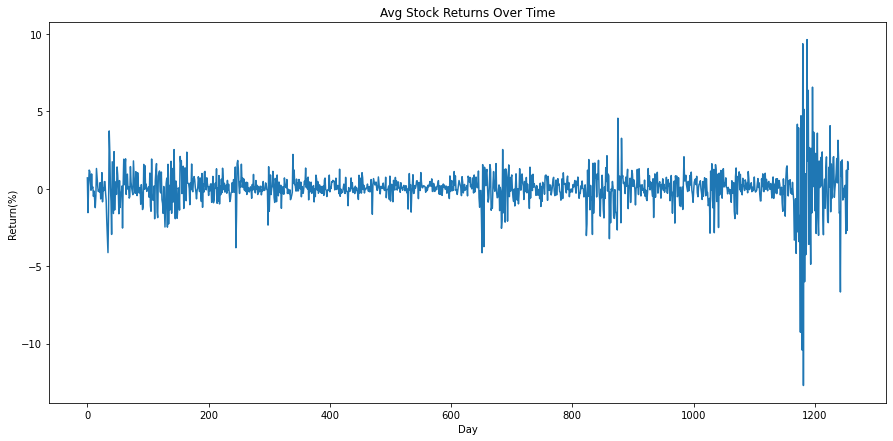

In [11]:
plt.figure(figsize = (15,7))
plt.plot(daily_returns)
plt.title('Avg Stock Returns Over Time')
plt.xlabel('Day')
plt.ylabel('Return(%)')
plt.show()

*Your written response here*




<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 5</b>
    </div>
    <div class = "panel-body"> 
    Using <code>stock_returns</code>, calculate the average daily returns over the historical period for the S&P 100 stocks. Store this result in another array called <code>avg_returns</code>. Check that the shape of <code>avg_returns</code> is a 1-d array with length 99.
    <br><br>Plot the average returns in <code>avg_returns</code> on a bar plot, sorted by highest to lowest returns. Provide an appropriate title, axis labels, and adjust the figure size for the plot as needed. Your final plot should look like this:
    ![Task_5_Plot.JPG](attachment:Task_5_Plot.JPG)
    <br><br>Which stock experienced the highest average daily returns over the historical period? Which stock had the lowest? Provide some comments on whether those observations make sense and why.
    <p style="text-align:right;">[10pts]</p>
    </div>
</div>
<div class = "alert alert-block alert-info">
    <b>Hint</b>: The matplotlib function <b>plt.barh<b> gives a bar plot oriented horizontally.
</div>

In [12]:
avg_returns = np.array(stock_returns.mean())
avg_returns

array([ 9.11386784e-04,  4.70146484e-04,  5.65459849e-04,  7.01085641e-04,
        1.34379079e-03, -4.44612768e-04,  3.97547767e-04,  4.45145643e-04,
        8.75457733e-04,  1.46880920e-03,  2.24158691e-04,  3.14393224e-04,
        3.41689654e-04, -3.29352438e-04,  2.44005449e-05,  2.65065845e-04,
        4.72179794e-04, -4.49856536e-06,  2.11359011e-04,  1.39492668e-05,
        4.69140148e-04,  8.55916890e-04,  1.76737727e-04,  2.57589751e-04,
       -1.79015761e-04, -1.66547808e-04,  7.12869286e-04,  7.93351162e-04,
        5.49675973e-04, -2.79730450e-04,  1.20083201e-04, -1.01792178e-04,
        1.12726922e-03,  2.20720652e-05,  2.55920194e-04,  2.29100630e-04,
        2.51027753e-04, -5.04917219e-04,  7.58796400e-04, -1.02068911e-04,
        1.15534655e-04, -9.35176120e-04, -2.07561845e-04, -3.21551580e-05,
        7.91869643e-04,  2.37514103e-05,  7.37471591e-04,  3.99861332e-04,
       -7.40589819e-05,  6.56593209e-04,  3.94458037e-04,  3.73419133e-04,
       -4.94554013e-04, -

In [13]:
avg_returns.shape

(99,)

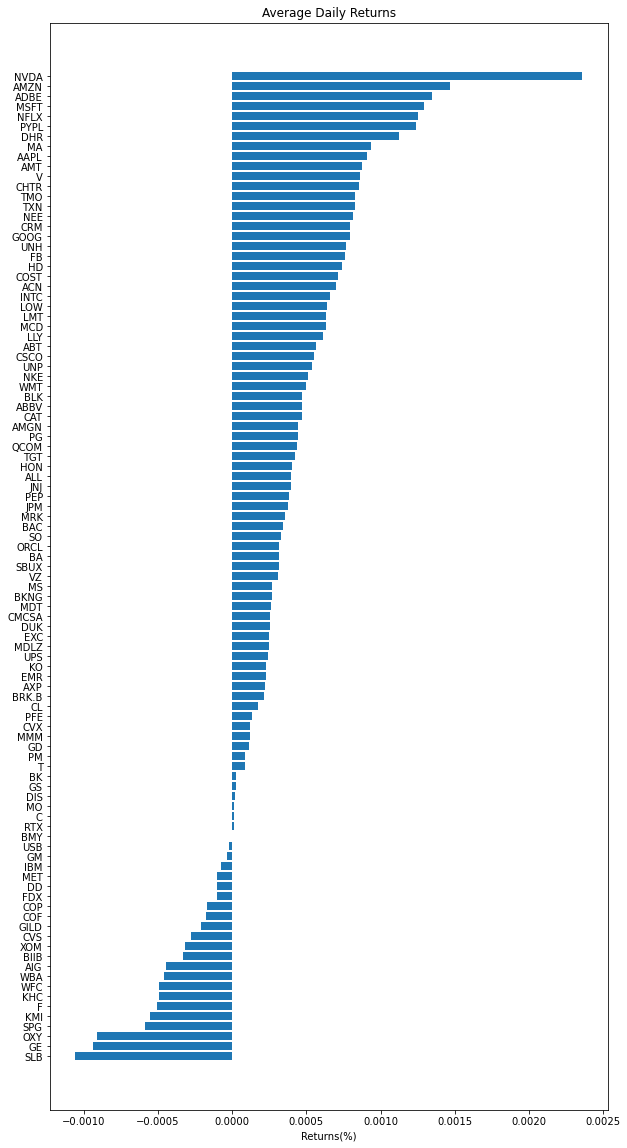

In [14]:
avg_returns = stock_returns.mean()
plt.figure(figsize = (10, 20))
plt.barh(avg_returns.sort_values(ascending = True).index, avg_returns.sort_values(ascending = True))
plt.title('Average Daily Returns')
plt.xlabel('Returns(%)')
plt.show()

In [15]:
sp100[np.argmax(avg_returns.mean())]

'AAPL'

In [16]:
sp100[np.argmin(avg_returns.mean())]

'AAPL'

In [17]:
np.argsort(stock_returns.mean(), axis = 0)

AAPL    82
ABBV    41
ABT     73
ACN     84
ADBE    53
        ..
VZ      69
WBA     67
WFC      4
WMT      9
XOM     71
Length: 99, dtype: int64

*Your written response here*




<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 6</b>
    </div>
    <div class = "panel-body"> 
    Using stock_returns, calculate the standard deviation of daily returns over the historical period for the S&P 100 stocks. Store this result in another array called <code>std_returns</code>. Check that the shape of <code>std_returns</code> is a 1-d array with length 99.
    <br><br>Which stock experienced the highest volatility over the historical period? Which stock had the lowest? Provide some comments on whether those observations make sense and why.
    <p style="text-align:right;">[10pts]</p>
    </div>
</div>

In [18]:
std_returns = stock_returns.std()

In [19]:
std_returns

AAPL    0.018319
ABBV    0.019272
ABT     0.016069
ACN     0.015726
ADBE    0.019675
          ...   
VZ      0.012239
WBA     0.018826
WFC     0.020104
WMT     0.014062
XOM     0.017025
Length: 99, dtype: float64

In [20]:
std_returns.shape

(99,)

In [21]:
sp100[np.argmax(std_returns)]

'OXY'

In [22]:
sp100[np.argmin(std_returns)]

'VZ'

*Your written response here*




<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 7</b>
    </div>
    <div class = "panel-body"> 
    Plot a scatter plot of the standard deviation of returns on the horizontal axis (X) and the average returns on the vertical axis (Y). Provide the plot with a title and axis labels. Your final plot should look like this:
    ![Task_7_Plot.JPG](attachment:Task_7_Plot.JPG)
    <br><br>What can we conclude from the plot? Are there any noteworthy patterns or observations?
    <p style="text-align:right;">[10pts]</p>
    </div>
</div>

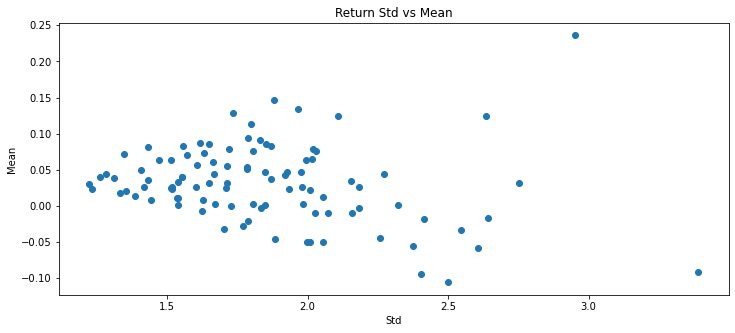

In [23]:
plt.figure(figsize = (12,5))
plt.scatter(std_returns*100, avg_returns*100)
plt.title('Return Std vs Mean')
plt.ylabel('Mean')
plt.xlabel('Std')
plt.show()

*Your written response here*




<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 8</b>
    </div>
    <div class = "panel-body"> 
    Calculate the correlation matrix for daily returns of the S&P 100 component stocks in <code>stock_returns</code>. Verify that the shape of the calculated matrix is <code>(99, 99)</code>. Store the correlation matrix in a dataframe called <code>corr_returns</code>, and set the stock tickers as both the index and columns of the dataframe. The first few rows will look like this:
    ![Task_8_Output.JPG](attachment:Task_8_Output.JPG)
    <p style="text-align:right;">[10pts]</p>
    </div>
</div>

In [24]:
corr_returns = stock_returns.corr()
corr_returns

,AAPL,ABBV,ABT,ACN,ADBE,AIG,ALL,AMGN,AMT,AMZN,...,UNH,UNP,UPS,USB,V,VZ,WBA,WFC,WMT,XOM
AAPL,1.000000,0.390847,0.557528,0.605230,0.625153,0.456664,0.511396,0.504762,0.435745,0.568603,...,0.524008,0.528295,0.487162,0.513159,0.664860,0.325173,0.404758,0.493070,0.352223,0.493823
ABBV,0.390847,1.000000,0.497696,0.431948,0.424513,0.369918,0.362506,0.541958,0.310967,0.342906,...,0.456695,0.349475,0.369810,0.391536,0.441915,0.313113,0.315802,0.372785,0.253245,0.362452
ABT,0.557528,0.497696,1.000000,0.617022,0.567810,0.429558,0.511913,0.627004,0.510068,0.441379,...,0.589273,0.463521,0.513599,0.513855,0.636263,0.436736,0.446255,0.491718,0.396957,0.448810
ACN,0.605230,0.431948,0.617022,1.000000,0.650124,0.594821,0.615049,0.517164,0.557219,0.504978,...,0.544213,0.597211,0.534125,0.661682,0.738841,0.441336,0.450654,0.620419,0.386750,0.573793
ADBE,0.625153,0.424513,0.567810,0.650124,1.000000,0.448636,0.502674,0.491707,0.452774,0.619418,...,0.511701,0.480401,0.484257,0.468921,0.722728,0.302190,0.385484,0.447240,0.351663,0.423721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VZ,0.325173,0.313113,0.436736,0.441336,0.302190,0.335947,0.444302,0.390989,0.440905,0.232091,...,0.383126,0.349599,0.390248,0.444478,0.378576,1.000000,0.389948,0.405611,0.427803,0.402168
WBA,0.404758,0.315802,0.446255,0.450654,0.385484,0.361457,0.392975,0.458341,0.308733,0.320213,...,0.413886,0.368323,0.457442,0.500878,0.421464,0.389948,1.000000,0.474730,0.407872,0.383292
WFC,0.493070,0.372785,0.491718,0.620419,0.447240,0.709998,0.640920,0.470637,0.439404,0.333845,...,0.522645,0.608224,0.541172,0.870003,0.605357,0.405611,0.474730,1.000000,0.325054,0.655385
WMT,0.352223,0.253245,0.396957,0.386750,0.351663,0.219279,0.343658,0.395012,0.361745,0.285986,...,0.357512,0.277499,0.377739,0.319510,0.353870,0.427803,0.407872,0.325054,1.000000,0.283622


In [25]:
corr_returns.shape

(99, 99)

<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 9</b>
    </div>
    <div class = "panel-body"> 
    A heatmap is a graphical representation of data that uses a system of color-coding to represent the relative magnitude of a set of data. We can create heatmaps using another external library called <b>seaborn</b>, and using the code snippet below
    <br>
    <code>
    plt.imshow(corr_returns, cmap = 'coolwarm')
    plt.colorbar()
    plt.show()
    </code>
    <br>Plot the heatmap for <code>corr_returns</code>. Rremember to provide a title to the plot and adjust the figure size as neccessary. Your final plot should look like this:
    ![Task_9_Plot.JPG](attachment:Task_9_Plot.JPG)
    <p style="text-align:right;">[5pts]</p>
    </div>
</div>

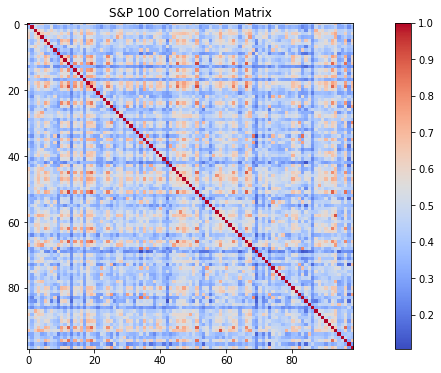

In [26]:
plt.figure (figsize = (15,6))
plt.imshow(corr_returns, cmap = 'coolwarm')
plt.colorbar()
plt.title ('S&P 100 Correlation Matrix')
plt.show()

<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 10</b>
    </div>
    <div class = "panel-body"> 
    From the correlation matrix <code>corr_returns</code>, identify the pair of stocks that are <i>most</i> positively correlated (BAC and JPM) and the pair that are <i>most</i> uncorrelated (DUK and NFLX). 
    <br><br>Comment on whether it is reasonable for the identified pairs of stocks to be positively correlated or uncorrelated, and propose a reason as to why for each of the two pairs of stocks.
    <p style="text-align:right;">[15pts]</p>
    </div>
</div>

In [27]:
corr_returns ['BAC'].cov(corr_returns['JPM'])

0.023193572612440438

In [28]:
corr_returns ['DUK'].cov(corr_returns['NFLX'])

-0.008049451725256484

I would say that it is reasonable for the two pairs of stocks (BAC and JPM) to be positively correlated, as the corr_returns function provides a positive result.  The DUK and NFLX pair are uncorrelated as the corr_returns function outputs a negative result, thus showing that their correlation is not feasible. 

*Your written response here*


